# Visualization

In [1]:
#!pip install cooltools==0.7.0
#!pip install seaborn
#!pip install cooler

# Contact vs Distance, Insulation & boundaries
As done in Tijan paper, will use cooltools to calculate insulation scores

## Contact vs Distance
Reference (https://cooltools.readthedocs.io/en/latest/notebooks/contacts_vs_distance.html)

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# import core packages
import warnings
warnings.filterwarnings("ignore")
from itertools import combinations
import os

# import semi-core packages
import matplotlib.pyplot as plt
from matplotlib import colors
%matplotlib inline
plt.style.use('seaborn-v0_8-poster')
import numpy as np
import pandas as pd
from multiprocessing import Pool

# import open2c libraries
import bioframe

import cooler
import cooltools

from packaging import version
if version.parse(cooltools.__version__) < version.parse('0.5.2'):
    raise AssertionError("tutorial relies on cooltools version 0.5.2 or higher,"+
                         "please check your cooltools version and update to the latest")

# count cpus
num_cpus = os.getenv('SLURM_CPUS_PER_TASK')
if not num_cpus:
    num_cpus = os.cpu_count()
num_cpus = int(num_cpus)
print(num_cpus)

10


In [4]:
# Use bioframe to fetch the genomic features from the UCSC.
mm10_chromsizes = bioframe.fetch_chromsizes('mm10')
mm10_cens = pd.read_csv('/Volumes/UKJIN_SSD/Genomics_03_Analysis_Working/data_vault_2024summer_microC/reference/mm10.centromere.txt', sep = '\t')

# create a view with chromosome arms using chromosome sizes and definition of centromeres
mm10_arms = bioframe.make_chromarms(mm10_chromsizes,  mm10_cens)

# select only those chromosomes available in cooler
clr = cooler.Cooler('../../cool/norm/G1.DMSO.Merged_100kb_KR.cool')
mm10_arms = mm10_arms[mm10_arms.chrom.isin(clr.chromnames)].reset_index(drop=True)


In [5]:
# Import mcool files
clr_G1DMSO = cooler.Cooler('../../cool/norm/G1.DMSO.Merged_1kb_KR.cool')
clr_G1dTAG = cooler.Cooler('../../cool/norm/G1.dTAG.Merged_1kb_KR.cool')
#clr_G1A485 = cooler.Cooler('../../cool/norm/G1.A485.Merged_1kb_KR.cool')
#clr_AsyncUT = cooler.Cooler('../../cool/norm/GSE178982_Async-RAD21-UT_pool_1kb_KR.cool')
#clr_AsyncAID = cooler.Cooler('../../cool/norm/GSE178982_Async-RAD21-AID_pool_1kb_KR.cool')

## Testing downsampling

In [7]:
# Downsampling DMSO and comaring
frac1 = 0.5
frac2 = 0.1
frac3 = 0.01
frac4 = 0.001
frac5 = 0.0001


clr_G1DMSO_raw = cooler.Cooler('../../cool/mcool/G1.DMSO.Merged.mcool::/resolutions/1000')

cooltools.sample(clr_G1DMSO_raw, out_clr_path=f'../../cool/G1.DMSO.Merged_1kb_downsampled-0.5.cool', frac = frac1, nproc = 10)
cooltools.sample(clr_G1DMSO_raw, out_clr_path=f'../../cool/G1.DMSO.Merged_1kb_downsampled-0.1.cool', frac = frac2, nproc = 10)
cooltools.sample(clr_G1DMSO_raw, out_clr_path=f'../../cool/G1.DMSO.Merged_1kb_downsampled-0.01.cool', frac = frac3, nproc = 10)
cooltools.sample(clr_G1DMSO_raw, out_clr_path=f'../../cool/G1.DMSO.Merged_1kb_downsampled-0.001.cool', frac = frac4, nproc = 10)
cooltools.sample(clr_G1DMSO_raw, out_clr_path=f'../../cool/GG1.DMSO.Merged_1kb_downsampled-0.0001.cool', frac = frac5, nproc = 10)


INFO:root:creating a Pool of 10 workers
INFO:root:creating a Pool of 10 workers
INFO:root:creating a Pool of 10 workers
INFO:root:creating a Pool of 10 workers
INFO:root:creating a Pool of 10 workers


In [8]:
outDir = '../../result/CvD'
os.makedirs(outDir, exist_ok=True)

In [12]:
clr_G1DMSO_ds = cooler.Cooler('../../cool/norm/G1.DMSO.Merged_1kb_downsampled-0.1.cool_KR.cool')
cvd_G1DMSO = cooltools.expected_cis(
    clr=clr_G1DMSO_ds,
    view_df=mm10_arms,
    smooth=True,
    aggregate_smoothed=True,
    smooth_sigma=0.1,
    nproc=num_cpus
)
cvd_G1DMSO.to_csv(os.path.join(outDir, 'G1.DMSO.Merged.1kb_cvd_smooth_ds0.1.tsv'), sep = '\t', index = False)

clr_G1DMSO_ds = cooler.Cooler('../../cool/norm/G1.DMSO.Merged_1kb_downsampled-0.01.cool_KR.cool')
cvd_G1DMSO = cooltools.expected_cis(
    clr=clr_G1DMSO_ds,
    view_df=mm10_arms,
    smooth=True,
    aggregate_smoothed=True,
    smooth_sigma=0.1,
    nproc=num_cpus
)
cvd_G1DMSO.to_csv(os.path.join(outDir, 'G1.DMSO.Merged.1kb_cvd_smooth_ds0.01.tsv'), sep = '\t', index = False)

clr_G1DMSO_ds = cooler.Cooler('../../cool/norm/G1.DMSO.Merged_1kb_downsampled-0.001.cool_KR.cool')
cvd_G1DMSO = cooltools.expected_cis(
    clr=clr_G1DMSO_ds,
    view_df=mm10_arms,
    smooth=True,
    aggregate_smoothed=True,
    smooth_sigma=0.1,
    nproc=num_cpus
)
cvd_G1DMSO.to_csv(os.path.join(outDir, 'G1.DMSO.Merged.1kb_cvd_smooth_ds0.001.tsv'), sep = '\t', index = False)

clr_G1DMSO_ds = cooler.Cooler('../../cool/norm/G1.DMSO.Merged_1kb_downsampled-0.0001.cool_KR.cool')
cvd_G1DMSO = cooltools.expected_cis(
    clr=clr_G1DMSO_ds,
    view_df=mm10_arms,
    smooth=True,
    aggregate_smoothed=True,
    smooth_sigma=0.1,
    nproc=num_cpus
)
cvd_G1DMSO.to_csv(os.path.join(outDir, 'G1.DMSO.Merged.1kb_cvd_smooth_ds0.0001.tsv'), sep = '\t', index = False)


INFO:root:creating a Pool of 10 workers
INFO:root:creating a Pool of 10 workers
INFO:root:creating a Pool of 10 workers
INFO:root:creating a Pool of 10 workers


## Calculating CvD with downsampling

In [30]:
#clr_G1DMSO = cooler.Cooler('../../cool/norm/G1.DMSO.Merged_1kb_KR.cool')
#clr_G1dTAG = cooler.Cooler('../../cool/norm/G1.dTAG.Merged_1kb_KR.cool')
#clr_G1A485 = cooler.Cooler('../../cool/norm/G1.A485.Merged_1kb_KR.cool')

clr_AsyncUT = cooler.Cooler('../../cool/norm/GSE178982.Async.UT_1kb_KR.cool')
clr_AsyncAID = cooler.Cooler('../../cool/norm/GSE178982.Async.AID_1kb_KR.cool')

In [31]:
dsNum = 5000000
#readNum_DMSO = clr_G1DMSO.info["sum"]
#readNum_dTAG = clr_G1dTAG.info["sum"]
#readNum_A485 = clr_G1A485.info["sum"]
#frac_DMSO = dsNum/readNum_DMSO
#frac_dTAG = dsNum/readNum_dTAG
#frac_A485 = dsNum/readNum_A485

readNum_UT = clr_AsyncUT.info["sum"]
readNum_AID = clr_AsyncAID.info["sum"]
frac_UT = dsNum/readNum_UT
frac_AID = dsNum/readNum_AID



In [34]:
#clr_G1DMSO = cooler.Cooler('../../cool/mcool/G1.DMSO.Merged.mcool::/resolutions/1000')
#clr_G1dTAG = cooler.Cooler('../../cool/mcool/G1.dTAG.Merged.mcool::/resolutions/1000')
#clr_G1A485 = cooler.Cooler('../../cool/mcool/G1.A485.Merged.mcool::/resolutions/1000')

clr_AsyncUT = cooler.Cooler('../../cool/mcool/GSE178982_Async-RAD21-UT_pool.mcool::/resolutions/1000')
clr_AsyncAID = cooler.Cooler('../../cool/mcool/GSE178982_Async-RAD21-AID_pool.mcool::/resolutions/1000')


In [35]:
#cooltools.sample(clr_G1DMSO, out_clr_path=f'../../cool/G1.DMSO.Merged_1kb_downsampled-5M.cool', frac = frac_DMSO, nproc = 10)
#cooltools.sample(clr_G1dTAG, out_clr_path=f'../../cool/G1.dTAG.Merged_1kb_downsampled-5M.cool', frac = frac_dTAG, nproc = 10)
#cooltools.sample(clr_G1A485, out_clr_path=f'../../cool/G1.A485.Merged_1kb_downsampled-5M.cool', frac = frac_A485, nproc = 10)

cooltools.sample(clr_AsyncUT, out_clr_path=f'../../cool/Async.UT_1kb_downsampled-5M.cool', frac = frac_A485, nproc = 10)
cooltools.sample(clr_AsyncAID, out_clr_path=f'../../cool/Async.AID_1kb_downsampled-5M.cool', frac = frac_A485, nproc = 10)


INFO:root:creating a Pool of 10 workers
INFO:root:creating a Pool of 10 workers


In [27]:
clr_G1DMSO_ds = cooler.Cooler('../../cool/norm/G1.DMSO.Merged_1kb_downsampled-5M.cool_KR.cool')
cvd_G1DMSO = cooltools.expected_cis(
    clr=clr_G1DMSO_ds,
    view_df=mm10_arms,
    smooth=True,
    aggregate_smoothed=True,
    smooth_sigma=0.1,
    nproc=num_cpus
)
cvd_G1DMSO.to_csv(os.path.join(outDir, 'G1.DMSO.Merged.1kb_cvd_smooth_ds5M.tsv'), sep = '\t', index = False)

clr_G1DMSO_ds = cooler.Cooler('../../cool/norm/G1.dTAG.Merged_1kb_downsampled-5M.cool_KR.cool')
cvd_G1DMSO = cooltools.expected_cis(
    clr=clr_G1DMSO_ds,
    view_df=mm10_arms,
    smooth=True,
    aggregate_smoothed=True,
    smooth_sigma=0.1,
    nproc=num_cpus
)
cvd_G1DMSO.to_csv(os.path.join(outDir, 'G1.dTAG.Merged.1kb_cvd_smooth_ds5M.tsv'), sep = '\t', index = False)

clr_G1DMSO_ds = cooler.Cooler('../../cool/norm/G1.A485.Merged_1kb_downsampled-5M.cool_KR.cool')
cvd_G1DMSO = cooltools.expected_cis(
    clr=clr_G1DMSO_ds,
    view_df=mm10_arms,
    smooth=True,
    aggregate_smoothed=True,
    smooth_sigma=0.1,
    nproc=num_cpus
)
cvd_G1DMSO.to_csv(os.path.join(outDir, 'G1.A485.Merged.1kb_cvd_smooth_ds5M.tsv'), sep = '\t', index = False)

INFO:root:creating a Pool of 10 workers
INFO:root:creating a Pool of 10 workers
INFO:root:creating a Pool of 10 workers


In [36]:
clr_G1DMSO_ds = cooler.Cooler('../../cool/norm/Async.UT_1kb_downsampled-5M.cool_KR.cool')
cvd_G1DMSO = cooltools.expected_cis(
    clr=clr_G1DMSO_ds,
    view_df=mm10_arms,
    smooth=True,
    aggregate_smoothed=True,
    smooth_sigma=0.1,
    nproc=num_cpus
)
cvd_G1DMSO.to_csv(os.path.join(outDir, 'Async.UT.1kb_cvd_smooth_ds5M.tsv'), sep = '\t', index = False)

clr_G1DMSO_ds = cooler.Cooler('../../cool/norm/Async.AID_1kb_downsampled-5M.cool_KR.cool')
cvd_G1DMSO = cooltools.expected_cis(
    clr=clr_G1DMSO_ds,
    view_df=mm10_arms,
    smooth=True,
    aggregate_smoothed=True,
    smooth_sigma=0.1,
    nproc=num_cpus
)
cvd_G1DMSO.to_csv(os.path.join(outDir, 'Async.AID.1kb_cvd_smooth_ds5M.tsv'), sep = '\t', index = False)

INFO:root:creating a Pool of 10 workers
INFO:root:creating a Pool of 10 workers


In [16]:
clr_G1DMSO_ds = cooler.Cooler('../../cool/norm/G1.DMSO.Merged_1kb_downsampled-0.001.cool_KR.cool')
clr_G1DMSO_ds.info["sum"]

1359222.0

In [ ]:
cvd_G1DMSO = cooltools.expected_cis(
    clr=clr_G1DMSO,
    view_df=mm10_arms,
    smooth=True,
    aggregate_smoothed=True,
    smooth_sigma=0.1,
    nproc=num_cpus
)
cvd_G1DMSO.to_csv(os.path.join(outDir, 'G1.DMSO.Merged.1kb_cvd_smooth.tsv'), sep = '\t', index = False)


In [ ]:
# KR normalization need to be done using HiCExplorer in cluster
clr_G1DMSO_raw = cooler.Cooler('../../cool/mcool/G1.DMSO.Merged.mcool::/resolutions/1000')

#clr_G1A485_raw = cooler.Cooler('../../cool/mcool/G1.A485.Merged.mcool::/resolutions/1000')
#cooltools.sample(clr_G1DMSO_raw, out_clr_path=f'../../cool/G1.DMSO.Merged_1kb_downsampled.cool', frac = frac_DMSO, nproc = 8)
#cooltools.sample(clr_G1A485_raw, out_clr_path=f'../../cool/G1.A485.Merged_1kb_downsampled.cool', frac = frac_A485, nproc = 8)
#clr_G1DMSO_ds = cooler.Cooler('../../cool/norm/G1.DMSO.Merged_1kb_KR_downsampled.cool')
#clr_G1A485_ds = cooler.Cooler('../../cool/norm/G1.A485.Merged_1kb_KR_downsampled.cool')


In [11]:
# Parameters for downsampling
readNum_DMSO = clr_G1DMSO.info["sum"]
readNum_dTAG = clr_G1dTAG.info["sum"]
readNum_A485 = clr_G1A485.info["sum"]
frac_DMSO = readNum_dTAG/readNum_DMSO
frac_A485 = readNum_dTAG/readNum_A485

readNum_UT = clr_AsyncUT.info["sum"]
readNum_AID = clr_AsyncAID.info["sum"]
frac_AID = readNum_UT/readNum_AID
frac_AID

0.9511836359011738

In [12]:
# Downsampling DMSO and A485
# KR normalization need to be done using HiCExplorer in cluster
#clr_G1DMSO_raw = cooler.Cooler('../../cool/mcool/G1.DMSO.Merged.mcool::/resolutions/1000')
#clr_G1A485_raw = cooler.Cooler('../../cool/mcool/G1.A485.Merged.mcool::/resolutions/1000')
#cooltools.sample(clr_G1DMSO_raw, out_clr_path=f'../../cool/G1.DMSO.Merged_1kb_downsampled.cool', frac = frac_DMSO, nproc = 8)
#cooltools.sample(clr_G1A485_raw, out_clr_path=f'../../cool/G1.A485.Merged_1kb_downsampled.cool', frac = frac_A485, nproc = 8)
#clr_G1DMSO_ds = cooler.Cooler('../../cool/norm/G1.DMSO.Merged_1kb_KR_downsampled.cool')
#clr_G1A485_ds = cooler.Cooler('../../cool/norm/G1.A485.Merged_1kb_KR_downsampled.cool')

#clr_AsyncAID_raw = cooler.Cooler('../../cool/mcool/GSE178982_Async-RAD21-AID_pool.mcool::/resolutions/1000')
#cooltools.sample(clr_AsyncAID_raw, out_clr_path=f'../../cool/GSE178982_Async-RAD21-AID_pool_1kb_downsampled.cool', frac = frac_AID, nproc = 10)
clr_AsyncUT_ds = cooler.Cooler('../../cool/norm/GSE178982_Async-RAD21-UT_pool_1kb_KR.cool')
clr_AsyncAID_ds = cooler.Cooler('../../cool/norm/GSE178982_Async-RAD21-AID_pool_1kb_KR_downsampled.cool')

### Calculate the P(s) curve

In [13]:
outDir = '../../result/CvD'
os.makedirs(outDir, exist_ok=True)

In [10]:
# cvd == contacts-vs-distance
cvd_G1DMSO = cooltools.expected_cis(
    clr=clr_G1DMSO,
    view_df=mm10_arms,
    smooth=True,
    aggregate_smoothed=True,
    smooth_sigma=0.1,
    nproc=num_cpus
)
cvd_G1DMSO.to_csv(os.path.join(outDir, 'G1.DMSO.Merged.1kb_cvd_smooth.tsv'), sep = '\t', index = False)

cvd_G1dTAG = cooltools.expected_cis(
    clr=clr_G1dTAG,
    view_df=mm10_arms,
    smooth=True,
    aggregate_smoothed=True,
    smooth_sigma=0.1,
    nproc=num_cpus
)
cvd_G1dTAG.to_csv(os.path.join(outDir, 'G1.dTAG.Merged.1kb_cvd_smooth.tsv'), sep = '\t', index = False)

cvd_G1A485 = cooltools.expected_cis(
    clr=clr_G1A485,
    view_df=mm10_arms,
    smooth=True,
    aggregate_smoothed=True,
    smooth_sigma=0.1,
    nproc=num_cpus
)
cvd_G1A485.to_csv(os.path.join(outDir, 'G1.A485.Merged.1kb_cvd_smooth.tsv'), sep = '\t', index = False)


INFO:root:creating a Pool of 10 workers
INFO:root:creating a Pool of 10 workers
python(39472) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(39473) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(39474) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(39475) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(39476) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(39477) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(39478) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(39479) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(39480) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(39481) MallocStackLogging: can'

In [30]:
# cvd == contacts-vs-distance
cvd_G1DMSO = cooltools.expected_cis(
    clr=clr_G1DMSO_ds,
    view_df=mm10_arms,
    smooth=True,
    aggregate_smoothed=True,
    smooth_sigma=0.1,
    nproc=num_cpus
)
cvd_G1DMSO.to_csv(os.path.join(outDir, 'G1.DMSO.Merged.1kb.ds_cvd_smooth.tsv'), sep = '\t', index = False)

cvd_G1dTAG = cooltools.expected_cis(
    clr=clr_G1dTAG,
    view_df=mm10_arms,
    smooth=True,
    aggregate_smoothed=True,
    smooth_sigma=0.1,
    nproc=num_cpus
)
cvd_G1dTAG.to_csv(os.path.join(outDir, 'G1.dTAG.Merged.1kb.ds_cvd_smooth.tsv'), sep = '\t', index = False)

cvd_G1A485 = cooltools.expected_cis(
    clr=clr_G1A485_ds,
    view_df=mm10_arms,
    smooth=True,
    aggregate_smoothed=True,
    smooth_sigma=0.1,
    nproc=num_cpus
)
cvd_G1A485.to_csv(os.path.join(outDir, 'G1.A485.Merged.1kb.ds_cvd_smooth.tsv'), sep = '\t', index = False)


INFO:root:creating a Pool of 8 workers
INFO:root:creating a Pool of 8 workers
INFO:root:creating a Pool of 8 workers


In [14]:
# cvd == contacts-vs-distance
cvd_AsyncUT = cooltools.expected_cis(
    clr=clr_AsyncUT_ds,
    view_df=mm10_arms,
    smooth=True,
    aggregate_smoothed=True,
    smooth_sigma=0.1,
    nproc=num_cpus
)
cvd_AsyncUT.to_csv(os.path.join(outDir, 'Async.UT.1kb.ds_cvd_smooth.tsv'), sep = '\t', index = False)

INFO:root:creating a Pool of 10 workers


In [15]:
cvd_AsyncAID = cooltools.expected_cis(
    clr=clr_AsyncAID_ds,
    view_df=mm10_arms,
    smooth=True,
    aggregate_smoothed=True,
    smooth_sigma=0.1,
    nproc=num_cpus
)
cvd_AsyncAID.to_csv(os.path.join(outDir, 'Async.AID.1kb.ds_cvd_smooth.tsv'), sep = '\t', index = False)

INFO:root:creating a Pool of 10 workers


In [8]:
cvd_G1DMSO = pd.read_csv(os.path.join(outDir, 'G1.DMSO.Merged.1kb_cvd_smooth.tsv'), sep='\t')
cvd_G1dTAG = pd.read_csv(os.path.join(outDir, 'G1.dTAG.Merged.1kb_cvd_smooth.tsv'), sep='\t')
cvd_G1A485 = pd.read_csv(os.path.join(outDir, 'G1.A485.Merged.1kb_cvd_smooth.tsv'), sep='\t')

In [31]:
cvd_G1DMSO = pd.read_csv(os.path.join(outDir, 'G1.DMSO.Merged.1kb.ds_cvd_smooth.tsv'), sep='\t')
cvd_G1dTAG = pd.read_csv(os.path.join(outDir, 'G1.dTAG.Merged.1kb.ds_cvd_smooth.tsv'), sep='\t')
cvd_G1A485 = pd.read_csv(os.path.join(outDir, 'G1.A485.Merged.1kb.ds_cvd_smooth.tsv'), sep='\t')

In [16]:
cvd_AsyncUT = pd.read_csv(os.path.join(outDir, 'Async.UT.1kb.ds_cvd_smooth.tsv'), sep='\t')
cvd_AsyncAID = pd.read_csv(os.path.join(outDir, 'Async.AID.1kb.ds_cvd_smooth.tsv'), sep='\t')


we can pass flags to expected_cis() that return smoothed and aggregated columns for futher analysis (which are on by default).

Note that the plots below use smooth_sigma=0.1, which is relatively conservative, and this parameter can be lowered (with discretion) for sufficiently high-resolution datasets.

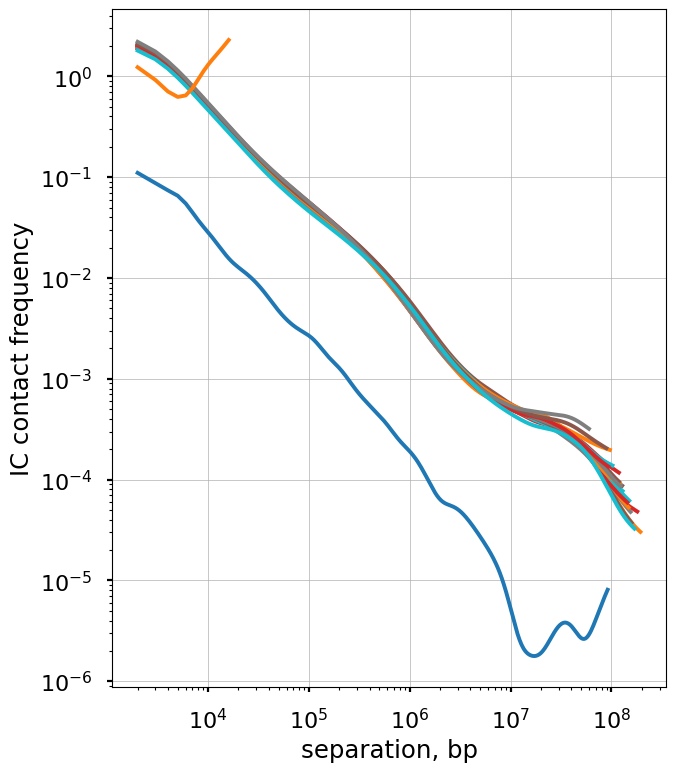

In [32]:
cvd_smooth_agg = cvd_G1DMSO
cvd_smooth_agg['balanced.avg.smoothed'].loc[cvd_smooth_agg['dist'] < 2] = np.nan

f, ax = plt.subplots(1,1)

for region in mm10_arms['name']:
    ax.loglog(
        cvd_smooth_agg['dist_bp'].loc[cvd_smooth_agg['region1']==region],
        cvd_smooth_agg['balanced.avg.smoothed'].loc[cvd_smooth_agg['region1']==region],
    )
    ax.set(
        xlabel='separation, bp',
        ylabel='IC contact frequency')
    ax.set_aspect(1.0)
    ax.grid(lw=0.5)


The balanced.avg.smoothed.agg is averaged across regions, and shows the same exact curve for each.

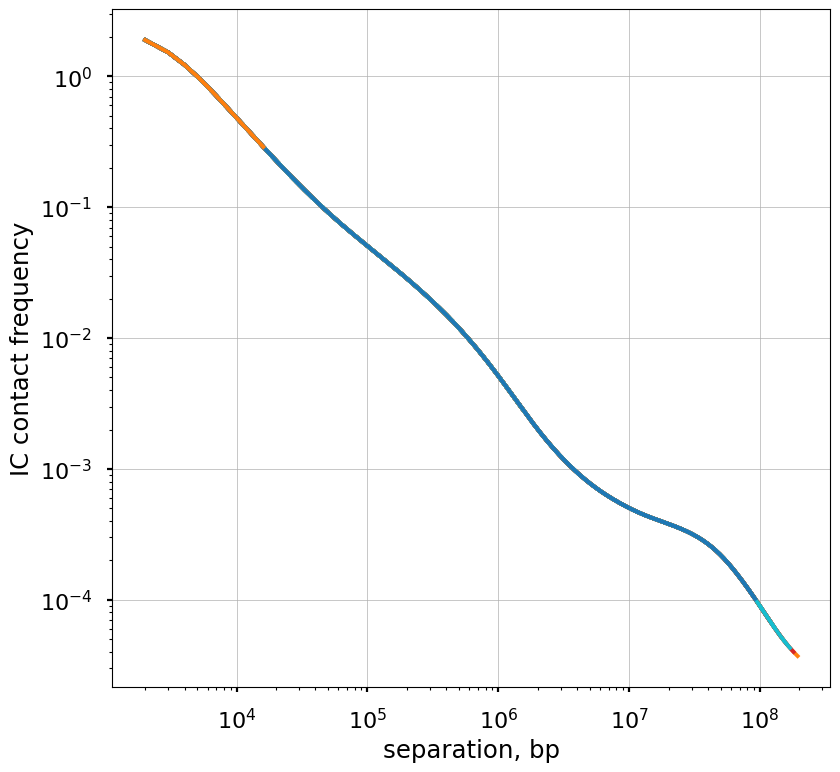

In [33]:
cvd_smooth_agg['balanced.avg.smoothed.agg'].loc[cvd_smooth_agg['dist'] < 2] = np.nan
f, ax = plt.subplots(1,1)

for region in mm10_arms['name']:
    ax.loglog(
        cvd_smooth_agg['dist_bp'].loc[cvd_smooth_agg['region1']==region],
        cvd_smooth_agg['balanced.avg.smoothed.agg'].loc[cvd_smooth_agg['region1']==region],
    )
    ax.set(
        xlabel='separation, bp',
        ylabel='IC contact frequency')
    ax.set_aspect(1.0)
    ax.grid(lw=0.5)

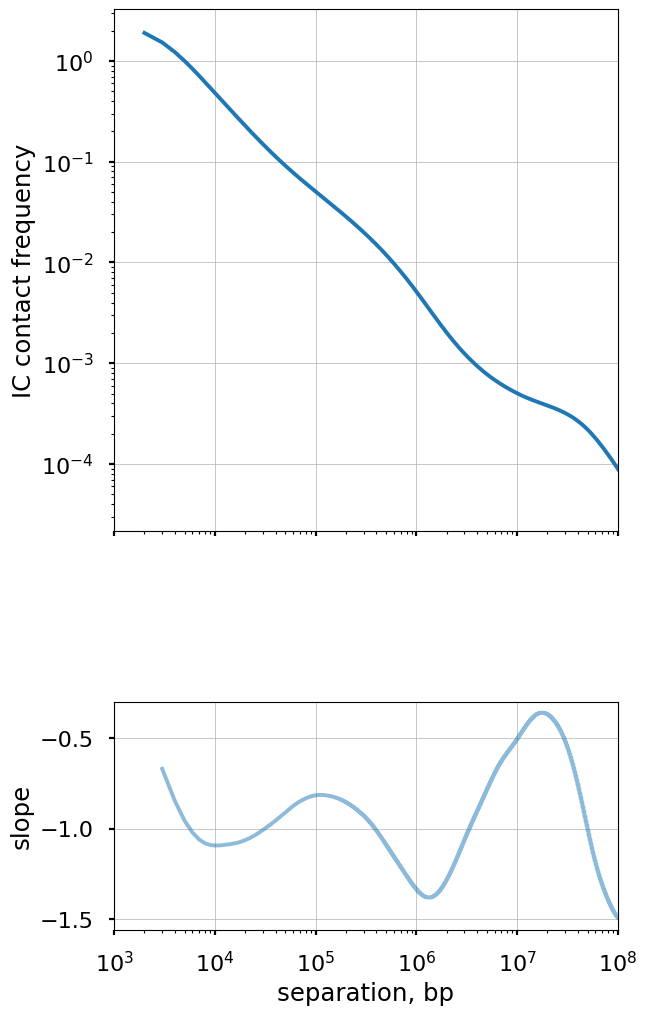

In [34]:
# Just take a single value for each genomic separation
note = '.ds'
cvd_smooth_agg = cvd_G1DMSO
cvd_smooth_agg['balanced.avg.smoothed'].loc[cvd_smooth_agg['dist'] < 2] = np.nan
cvd_smooth_agg['balanced.avg.smoothed.agg'].loc[cvd_smooth_agg['dist'] < 2] = np.nan

cvd_merged = cvd_smooth_agg.drop_duplicates(subset=['dist'])[['dist_bp', 'balanced.avg.smoothed.agg']]

df = pd.DataFrame(cvd_merged, columns = ['dist_bp', 'balanced.avg.smoothed.agg'])
df.to_csv(os.path.join(outDir, 'G1.DMSO.Merged.1kb' + note + '_cvd_smooth_merged.tsv'), sep = '\t', index = False)

# Calculate derivative in log-log space
der = np.gradient(np.log(cvd_merged['balanced.avg.smoothed.agg']),
                  np.log(cvd_merged['dist_bp']))

df = pd.DataFrame(der, columns = ['derivitive'])
df.to_csv(os.path.join(outDir, 'G1.DMSO.Merged.1kb' + note + '_cvd_smooth_merged_derivitive.tsv'), sep = '\t', index = False)


f, axs = plt.subplots(
    figsize=(6.5,13),
    nrows=2,
    gridspec_kw={'height_ratios':[6,2]},
    sharex=True)
ax = axs[0]
ax.loglog(
    cvd_merged['dist_bp'],
    cvd_merged['balanced.avg.smoothed.agg'],
    '-'
)

ax.set(
    ylabel='IC contact frequency',
    xlim=(1e3,1e8)
)
ax.set_aspect(1.0)
ax.grid(lw=0.5)


ax = axs[1]
ax.semilogx(
    cvd_merged['dist_bp'],
    der,
    alpha=0.5
)

ax.set(
    xlabel='separation, bp',
    ylabel='slope')

ax.grid(lw=0.5)

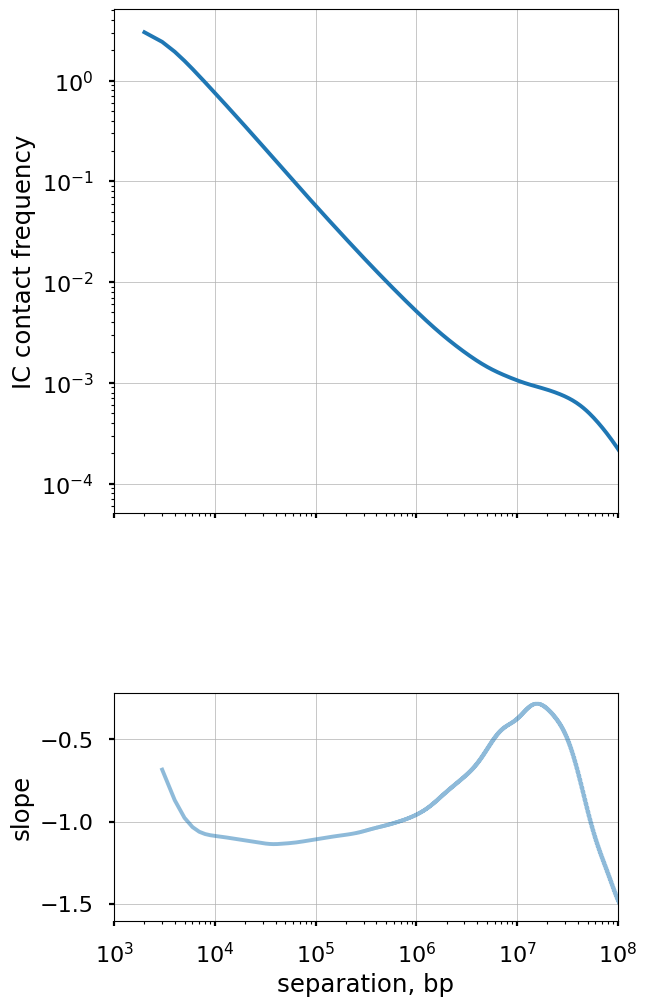

In [35]:
# Just take a single value for each genomic separation
note = '.ds'
cvd_smooth_agg = cvd_G1dTAG
cvd_smooth_agg['balanced.avg.smoothed'].loc[cvd_smooth_agg['dist'] < 2] = np.nan
cvd_smooth_agg['balanced.avg.smoothed.agg'].loc[cvd_smooth_agg['dist'] < 2] = np.nan

cvd_merged = cvd_smooth_agg.drop_duplicates(subset=['dist'])[['dist_bp', 'balanced.avg.smoothed.agg']]

df = pd.DataFrame(cvd_merged, columns = ['dist_bp', 'balanced.avg.smoothed.agg'])
df.to_csv(os.path.join(outDir, 'G1.dTAG.Merged.1kb' + note + '_cvd_smooth_merged.tsv'), sep = '\t', index = False)

# Calculate derivative in log-log space
der = np.gradient(np.log(cvd_merged['balanced.avg.smoothed.agg']),
                  np.log(cvd_merged['dist_bp']))

df = pd.DataFrame(der, columns = ['derivitive'])
df.to_csv(os.path.join(outDir, 'G1.dTAG.Merged.1kb' + note + '_cvd_smooth_merged_derivitive.tsv'), sep = '\t', index = False)


f, axs = plt.subplots(
    figsize=(6.5,13),
    nrows=2,
    gridspec_kw={'height_ratios':[6,2]},
    sharex=True)
ax = axs[0]
ax.loglog(
    cvd_merged['dist_bp'],
    cvd_merged['balanced.avg.smoothed.agg'],
    '-'
)

ax.set(
    ylabel='IC contact frequency',
    xlim=(1e3,1e8)
)
ax.set_aspect(1.0)
ax.grid(lw=0.5)


ax = axs[1]
ax.semilogx(
    cvd_merged['dist_bp'],
    der,
    alpha=0.5
)

ax.set(
    xlabel='separation, bp',
    ylabel='slope')

ax.grid(lw=0.5)

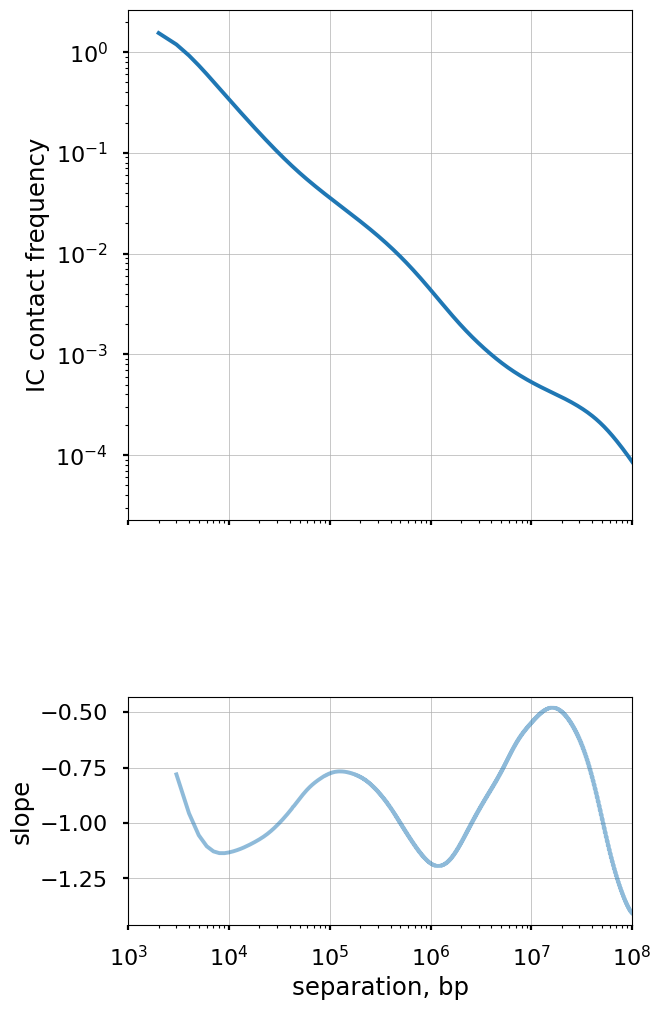

In [36]:
# Just take a single value for each genomic separation
note = '.ds'
cvd_smooth_agg = cvd_G1A485
cvd_smooth_agg['balanced.avg.smoothed'].loc[cvd_smooth_agg['dist'] < 2] = np.nan
cvd_smooth_agg['balanced.avg.smoothed.agg'].loc[cvd_smooth_agg['dist'] < 2] = np.nan

cvd_merged = cvd_smooth_agg.drop_duplicates(subset=['dist'])[['dist_bp', 'balanced.avg.smoothed.agg']]

df = pd.DataFrame(cvd_merged, columns = ['dist_bp', 'balanced.avg.smoothed.agg'])
df.to_csv(os.path.join(outDir, 'G1.A485.Merged.1kb' + note + '_cvd_smooth_merged.tsv'), sep = '\t', index = False)

# Calculate derivative in log-log space
der = np.gradient(np.log(cvd_merged['balanced.avg.smoothed.agg']),
                  np.log(cvd_merged['dist_bp']))

df = pd.DataFrame(der, columns = ['derivitive'])
df.to_csv(os.path.join(outDir, 'G1.A485.Merged.1kb' + note + '_cvd_smooth_merged_derivitive.tsv'), sep = '\t', index = False)

f, axs = plt.subplots(
    figsize=(6.5,13),
    nrows=2,
    gridspec_kw={'height_ratios':[6,2]},
    sharex=True)
ax = axs[0]
ax.loglog(
    cvd_merged['dist_bp'],
    cvd_merged['balanced.avg.smoothed.agg'],
    '-'
)

ax.set(
    ylabel='IC contact frequency',
    xlim=(1e3,1e8)
)
ax.set_aspect(1.0)
ax.grid(lw=0.5)


ax = axs[1]
ax.semilogx(
    cvd_merged['dist_bp'],
    der,
    alpha=0.5
)

ax.set(
    xlabel='separation, bp',
    ylabel='slope')

ax.grid(lw=0.5)

In [14]:
cvd_smooth_agg

,region1,region2,dist,dist_bp,contact_frequency,n_total,n_valid,count.sum,balanced.sum,count.avg,balanced.avg,balanced.avg.smoothed,balanced.avg.smoothed.agg
0,chr1_p,chr1_p,0,0,NaN,1555,1555,NaN,NaN,NaN,NaN,NaN,NaN
1,chr1_p,chr1_p,1,1000,0.074464,1554,1554,NaN,NaN,NaN,NaN,NaN,NaN
2,chr1_p,chr1_p,2,2000,6.607742,1553,1553,0.0,0.000000,0.000000,0.000000,0.000000,6.607742
3,chr1_p,chr1_p,3,3000,5.077098,1552,1552,0.0,0.000000,0.000000,0.000000,0.000000,5.077098
4,chr1_p,chr1_p,4,4000,3.934472,1551,1551,0.0,0.000000,0.000000,0.000000,0.000000,3.934472
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2725544,chrM_p,chrM_p,12,12000,1.177156,5,5,318.0,263.584498,63.600000,52.716900,45.480690,1.177156
2725545,chrM_p,chrM_p,13,13000,1.076807,4,4,204.0,167.809897,51.000000,41.952474,52.363512,1.076807
2725546,chrM_p,chrM_p,14,14000,0.991968,3,3,227.0,187.947055,75.666667,62.649018,59.625373,0.991968
2725547,chrM_p,chrM_p,15,15000,0.919378,2,2,110.0,134.848747,55.000000,67.424374,67.242995,0.919378


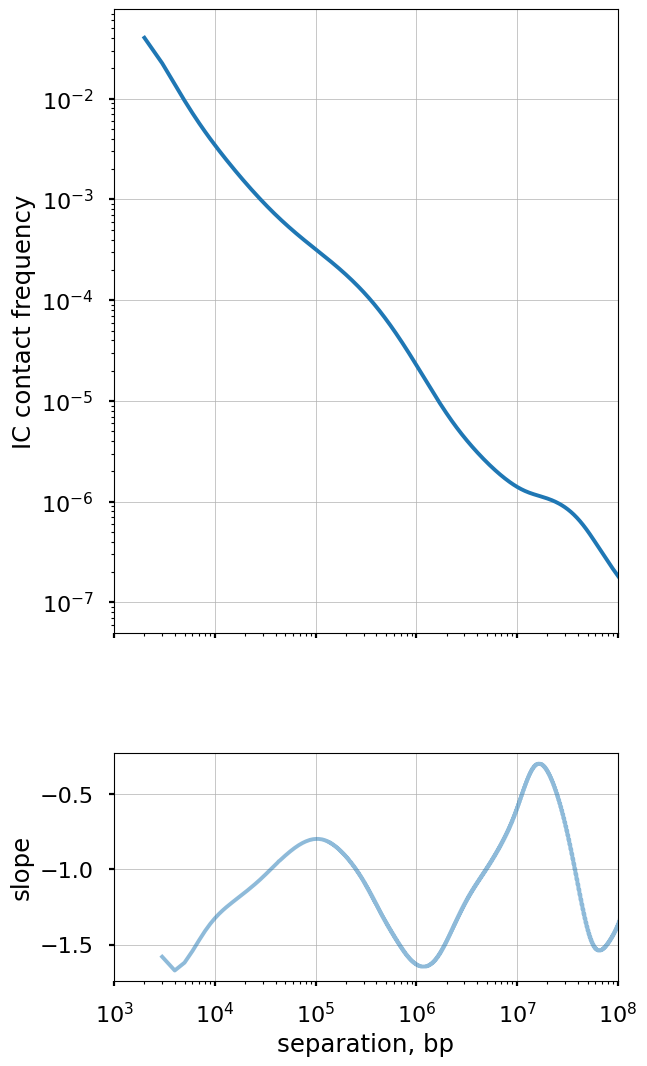

In [17]:
# Just take a single value for each genomic separation
note = '.ds'
cvd_smooth_agg = cvd_AsyncUT
cvd_smooth_agg['balanced.avg.smoothed'].loc[cvd_smooth_agg['dist'] < 2] = np.nan
cvd_smooth_agg['balanced.avg.smoothed.agg'].loc[cvd_smooth_agg['dist'] < 2] = np.nan

cvd_merged = cvd_smooth_agg.drop_duplicates(subset=['dist'])[['dist_bp', 'balanced.avg.smoothed.agg']]

df = pd.DataFrame(cvd_merged, columns = ['dist_bp', 'balanced.avg.smoothed.agg'])
df.to_csv(os.path.join(outDir, 'Async.UT.1kb' + note + '_cvd_smooth_merged.tsv'), sep = '\t', index = False)

# Calculate derivative in log-log space
der = np.gradient(np.log(cvd_merged['balanced.avg.smoothed.agg']),
                  np.log(cvd_merged['dist_bp']))

df = pd.DataFrame(der, columns = ['derivitive'])
df.to_csv(os.path.join(outDir, 'Async.UT.1kb' + note + '_cvd_smooth_merged_derivitive.tsv'), sep = '\t', index = False)

f, axs = plt.subplots(
    figsize=(6.5,13),
    nrows=2,
    gridspec_kw={'height_ratios':[6,2]},
    sharex=True)
ax = axs[0]
ax.loglog(
    cvd_merged['dist_bp'],
    cvd_merged['balanced.avg.smoothed.agg'],
    '-'
)

ax.set(
    ylabel='IC contact frequency',
    xlim=(1e3,1e8)
)
ax.set_aspect(1.0)
ax.grid(lw=0.5)


ax = axs[1]
ax.semilogx(
    cvd_merged['dist_bp'],
    der,
    alpha=0.5
)

ax.set(
    xlabel='separation, bp',
    ylabel='slope')

ax.grid(lw=0.5)

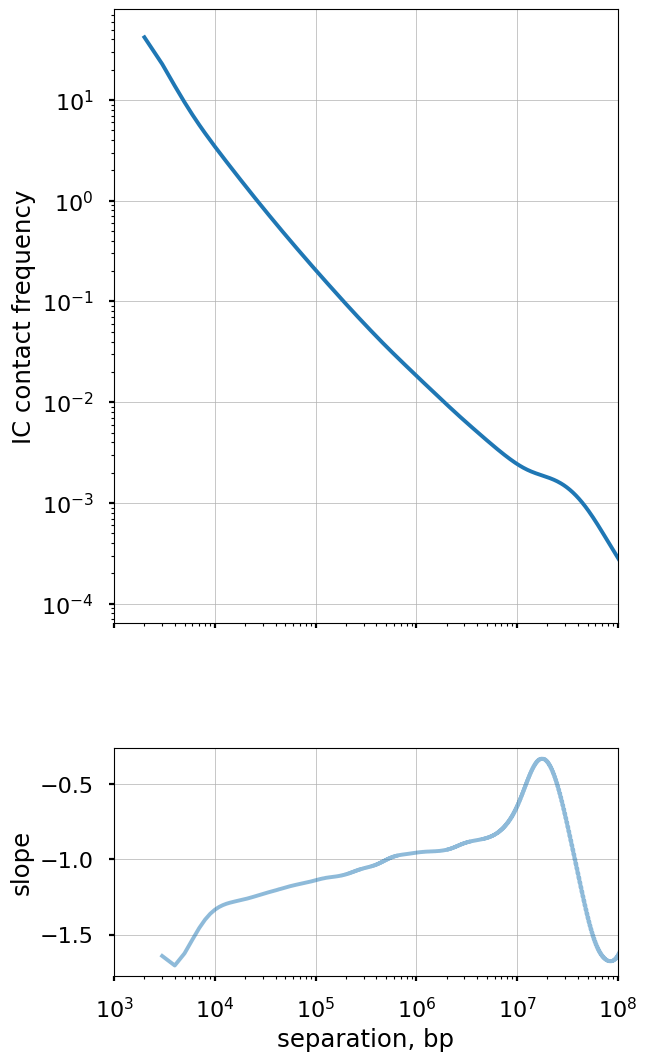

In [18]:
# Just take a single value for each genomic separation
note = '.ds'
cvd_smooth_agg = cvd_AsyncAID
cvd_smooth_agg['balanced.avg.smoothed'].loc[cvd_smooth_agg['dist'] < 2] = np.nan
cvd_smooth_agg['balanced.avg.smoothed.agg'].loc[cvd_smooth_agg['dist'] < 2] = np.nan

cvd_merged = cvd_smooth_agg.drop_duplicates(subset=['dist'])[['dist_bp', 'balanced.avg.smoothed.agg']]

df = pd.DataFrame(cvd_merged, columns = ['dist_bp', 'balanced.avg.smoothed.agg'])
df.to_csv(os.path.join(outDir, 'Async.AID.1kb' + note + '_cvd_smooth_merged.tsv'), sep = '\t', index = False)

# Calculate derivative in log-log space
der = np.gradient(np.log(cvd_merged['balanced.avg.smoothed.agg']),
                  np.log(cvd_merged['dist_bp']))

df = pd.DataFrame(der, columns = ['derivitive'])
df.to_csv(os.path.join(outDir, 'Async.AID.1kb' + note + '_cvd_smooth_merged_derivitive.tsv'), sep = '\t', index = False)

f, axs = plt.subplots(
    figsize=(6.5,13),
    nrows=2,
    gridspec_kw={'height_ratios':[6,2]},
    sharex=True)
ax = axs[0]
ax.loglog(
    cvd_merged['dist_bp'],
    cvd_merged['balanced.avg.smoothed.agg'],
    '-'
)

ax.set(
    ylabel='IC contact frequency',
    xlim=(1e3,1e8)
)
ax.set_aspect(1.0)
ax.grid(lw=0.5)


ax = axs[1]
ax.semilogx(
    cvd_merged['dist_bp'],
    der,
    alpha=0.5
)

ax.set(
    xlabel='separation, bp',
    ylabel='slope')

ax.grid(lw=0.5)